## Classical Q-Learning on FrozenLake Problem

In [1]:
import time

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

In [2]:
### Exploring environment with basic env setup and a series of random actions ###

env = gym.make('FrozenLake-v1', is_slippery=False, render_mode='human')

observation, info = env.reset()

# Print info, obs space, action space. Action space is: 0, 1, 2, 3 = left, down, right, up
print(f'{info=} | {observation=} | {env.observation_space=} | {env.action_space=}')
print('-'*100)

for step in range(10):
    env.render()
    action = env.action_space.sample()
    observation, reward, done, truncated, info = env.step(action)
    print(f'{step=} | {action=} | {observation=} | {reward=} | {done=} | {truncated=} | {info=}')
    time.sleep(0.2)

    if done or truncated:
        break

env.close()

info={'prob': 1} | observation=0 | env.observation_space=Discrete(16) | env.action_space=Discrete(4)
----------------------------------------------------------------------------------------------------
step=0 | action=0 | observation=0 | reward=0.0 | done=False | truncated=False | info={'prob': 1.0}
step=1 | action=2 | observation=1 | reward=0.0 | done=False | truncated=False | info={'prob': 1.0}
step=2 | action=0 | observation=0 | reward=0.0 | done=False | truncated=False | info={'prob': 1.0}
step=3 | action=0 | observation=0 | reward=0.0 | done=False | truncated=False | info={'prob': 1.0}
step=4 | action=2 | observation=1 | reward=0.0 | done=False | truncated=False | info={'prob': 1.0}
step=5 | action=1 | observation=5 | reward=0.0 | done=True | truncated=False | info={'prob': 1.0}


### Actual RL/Classical Q-Learning Below

In [3]:
### Define hyperparameters and core functions that will be used during the actual training loop ###

TOTAL_EPISODES = 20000 # Number of times playing the entire game (NOT total number of steps).
ALPHA = 0.8 # Learning rate. More typical to start with smaller value (maybe 0.1-0.3) in more complex environments.
GAMMA = 0.95 # Discount rate

MAX_EPSILON = 1.0
MIN_EPSILON = 0.01
DECAY_RATE = 0.001
# epsilon = MAX_EPSILON # Set this inside of the training loop instead


def select_action_epsilon_greedy(epsilon, q_table, discrete_state, env):
    """Choose either best action or random action based on random number [0,1) vs. current epsilon."""

    if np.random.random() < epsilon:
        return env.action_space.sample()
    else: # Get index of max Q-value for the current state's row from the Q-table
        return np.argmax(q_table[discrete_state, :])
    

def compute_next_q_value(curr_q_value, new_state_optimal_q_value, reward):
    """Update the Q-value using the Bellman equation."""

    return curr_q_value + ALPHA * (reward + GAMMA * new_state_optimal_q_value - curr_q_value)


def exp_decay_epsilon(episode):
    """Decay epsilon after each episode to balance exploration and exploitation."""

    return MIN_EPSILON + (MAX_EPSILON - MIN_EPSILON) * np.exp(-DECAY_RATE * episode)

In [ ]:
### Execute the training loop ###

env = gym.make('FrozenLake-v1', is_slippery=False)
q_table = np.zeros([env.observation_space.n, env.action_space.n])
episode_rewards = []
track_progress_interval = 1000 # Print performance metric(s) every _ episodes

for episode in range(TOTAL_EPISODES):

    # Reset the environment and the done variables
    state, info = env.reset()
    done = False
    curr_episode_total_reward = 0

    # Decay epsilon - Note: Can simply be placed prior to while loop since using exp decay
    epsilon = exp_decay_epsilon(episode)

    # Play the game until win or lose
    while not done:
        # Perform action and get the associated reward and new state
        action = select_action_epsilon_greedy(epsilon, q_table, state, env)
        new_state, reward, done, truncated, info = env.step(action)

        # Get Q-value of the current (or technically previous) state for the selected action
        curr_q_value = q_table[state, action]

        # Get max Q-value for the new state's row from the Q-table
        new_state_optimal_q_value = np.max(q_table[new_state, :])

        # Update the Q-table for the current (previous) state+action
        q_table[state, action] = compute_next_q_value(curr_q_value, new_state_optimal_q_value, reward)

        # Track sum of rewards across the entire episode, and set the new state for next loop
        curr_episode_total_reward += reward
        state = new_state

    # Tracking performance across training
    episode_rewards.append(curr_episode_total_reward)
    if episode % track_progress_interval == 0 and episode != 0:
        successes_in_last_interval = int(np.sum(episode_rewards[episode - track_progress_interval:]))
        print(f'{episode=} | {successes_in_last_interval=}')

env.close()


episode=1000 | successes_in_last_interval=287
episode=2000 | successes_in_last_interval=740
episode=3000 | successes_in_last_interval=893
episode=4000 | successes_in_last_interval=957
episode=5000 | successes_in_last_interval=978
episode=6000 | successes_in_last_interval=992
episode=7000 | successes_in_last_interval=993
episode=8000 | successes_in_last_interval=990
episode=9000 | successes_in_last_interval=992
episode=10000 | successes_in_last_interval=989
episode=11000 | successes_in_last_interval=991
episode=12000 | successes_in_last_interval=991
episode=13000 | successes_in_last_interval=988
episode=14000 | successes_in_last_interval=986
episode=15000 | successes_in_last_interval=991
episode=16000 | successes_in_last_interval=988
episode=17000 | successes_in_last_interval=990
episode=18000 | successes_in_last_interval=991
episode=19000 | successes_in_last_interval=992


### Results

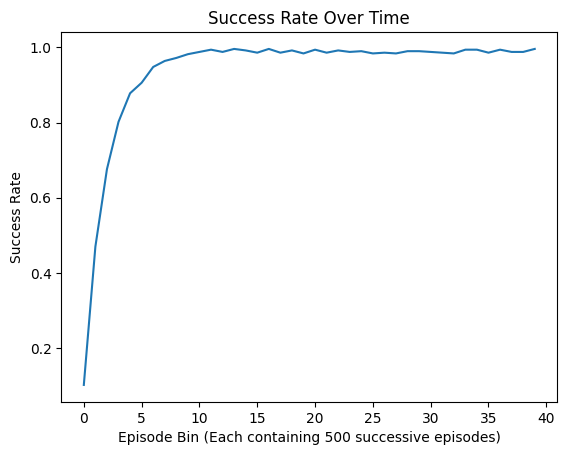

Q-Table:
[[0.73509189 0.77378094 0.77378094 0.73509189]
 [0.73509189 0.         0.81450625 0.77378094]
 [0.77378094 0.857375   0.77378094 0.81450625]
 [0.81450625 0.         0.76730359 0.77372193]
 [0.77378094 0.81450625 0.         0.73509189]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.         0.81450625]
 [0.         0.         0.         0.        ]
 [0.81450625 0.         0.857375   0.77378094]
 [0.81450625 0.9025     0.9025     0.        ]
 [0.857375   0.95       0.         0.857375  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.95       0.857375  ]
 [0.9025     0.95       1.         0.9025    ]
 [0.         0.         0.         0.        ]]


In [5]:
### Plot the results and show the Q-table ###

# Divide the episode rewards data into bins for plotting
bin_size = 500
binned_rewards = [episode_rewards[i:i + bin_size] for i in range(0, len(episode_rewards), bin_size)]
binned_rewards_averages = [np.mean(bin) for bin in binned_rewards]
x_values = [i for i in range(len(binned_rewards_averages))]

plt.plot(x_values, binned_rewards_averages)
plt.xlabel(f'Episode Bin (Each containing {bin_size} successive episodes)')
plt.ylabel('Success Rate')
plt.title(f'Success Rate Over Time')
plt.show()

print('Q-Table:')
print(q_table)

In [6]:
### Utilization of the trained policy (i.e., the learned Q-table) ###

# Re-make the environment, but with render_mode='human'
env = gym.make('FrozenLake-v1', is_slippery=False, render_mode='human')
state, info = env.reset()
done = False
step = 0
print(f'{step=} | {state=}')

# Play the game using the policy
while not done:
    env.render()
    action = np.argmax(q_table[state, :])
    state, reward, done, truncated, info = env.step(action)
    step += 1
    print(f'{step=} | {state=} | {action=} | {reward=} | {done=}')
    time.sleep(0.5)

env.close()

step=0 | state=0
step=1 | state=4 | action=1 | reward=0.0 | done=False
step=2 | state=8 | action=1 | reward=0.0 | done=False
step=3 | state=9 | action=2 | reward=0.0 | done=False
step=4 | state=13 | action=1 | reward=0.0 | done=False
step=5 | state=14 | action=2 | reward=0.0 | done=False
step=6 | state=15 | action=2 | reward=1.0 | done=True
